In [98]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
from statsmodels.tsa.arima_model import ARMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

In [119]:
arma_df = pd.read_csv(r"C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\market_data\daily\stocks\BATS_EWJ, 1D.csv",index_col='time', parse_dates=True)

In [120]:
# XME = 2,0,2
# XLC = 2,0,2
# XBI = 1,0,1
# XTN = 2,0,2
# EWJ = 1,0,1


In [121]:
log_diff = np.log(arma_df['close']).diff(1).dropna(axis=0)

In [122]:
len(log_diff)

6840

In [123]:
import statsmodels.api as sm

acf, ci = sm.tsa.acf(log_diff,nlags=5, alpha=0.05)
pacf, ci = sm.tsa.pacf(log_diff,nlags=5, alpha=0.05)

acf[0]
pacf[4]

-0.016961957785031793

In [124]:
ci

array([[ 1.        ,  1.        ],
       [-0.1204636 , -0.07306669],
       [-0.05613157, -0.00873466],
       [-0.00895344,  0.03844347],
       [-0.04066041,  0.0067365 ],
       [-0.05824071, -0.0108438 ]])

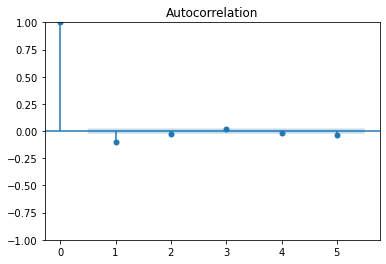

In [125]:
plot_acf(log_diff, alpha=0.05, lags=5).savefig("acf.jpg")

c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


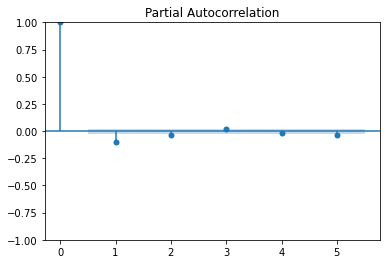

In [126]:
plot_pacf(log_diff, alpha=0.05, lags=5).savefig("pacf.jpg")

In [127]:
print(len(arma_df))

6841


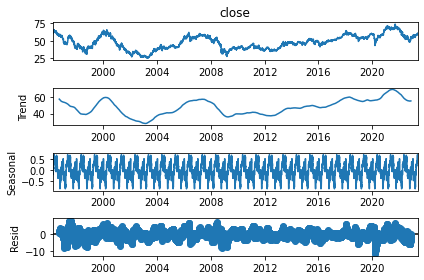

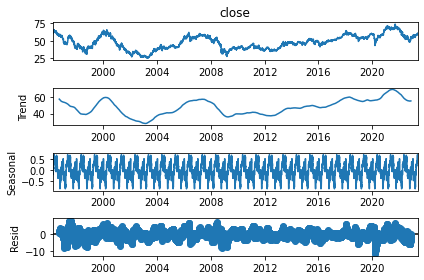

In [128]:
seasonal_result = seasonal_decompose(arma_df['close'], model="additive",period=252)

trend    = seasonal_result.trend
seasonal = seasonal_result.seasonal
residual = seasonal_result.resid

seasonal_result.plot()

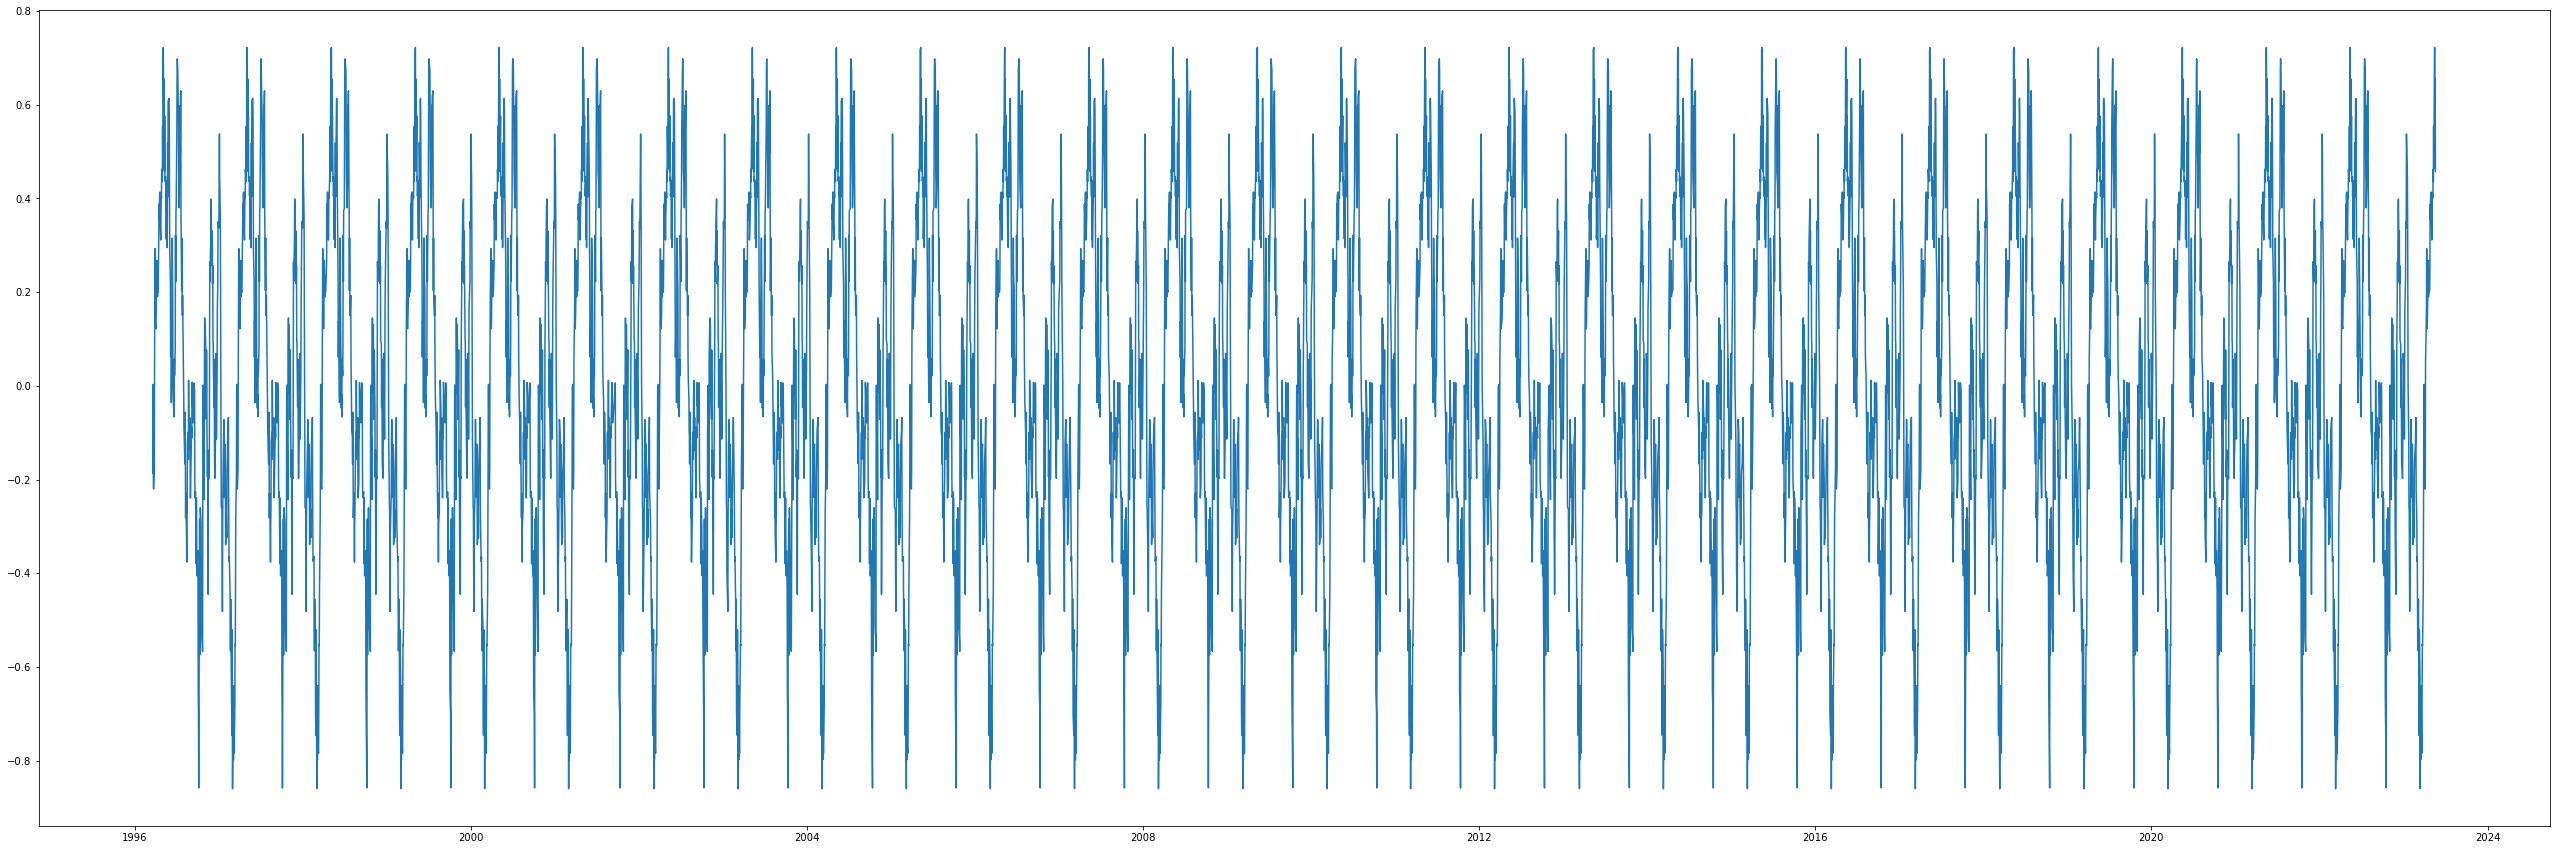

In [129]:
plt.figure(figsize=(45,15))

plt.plot(seasonal)

plt.show()

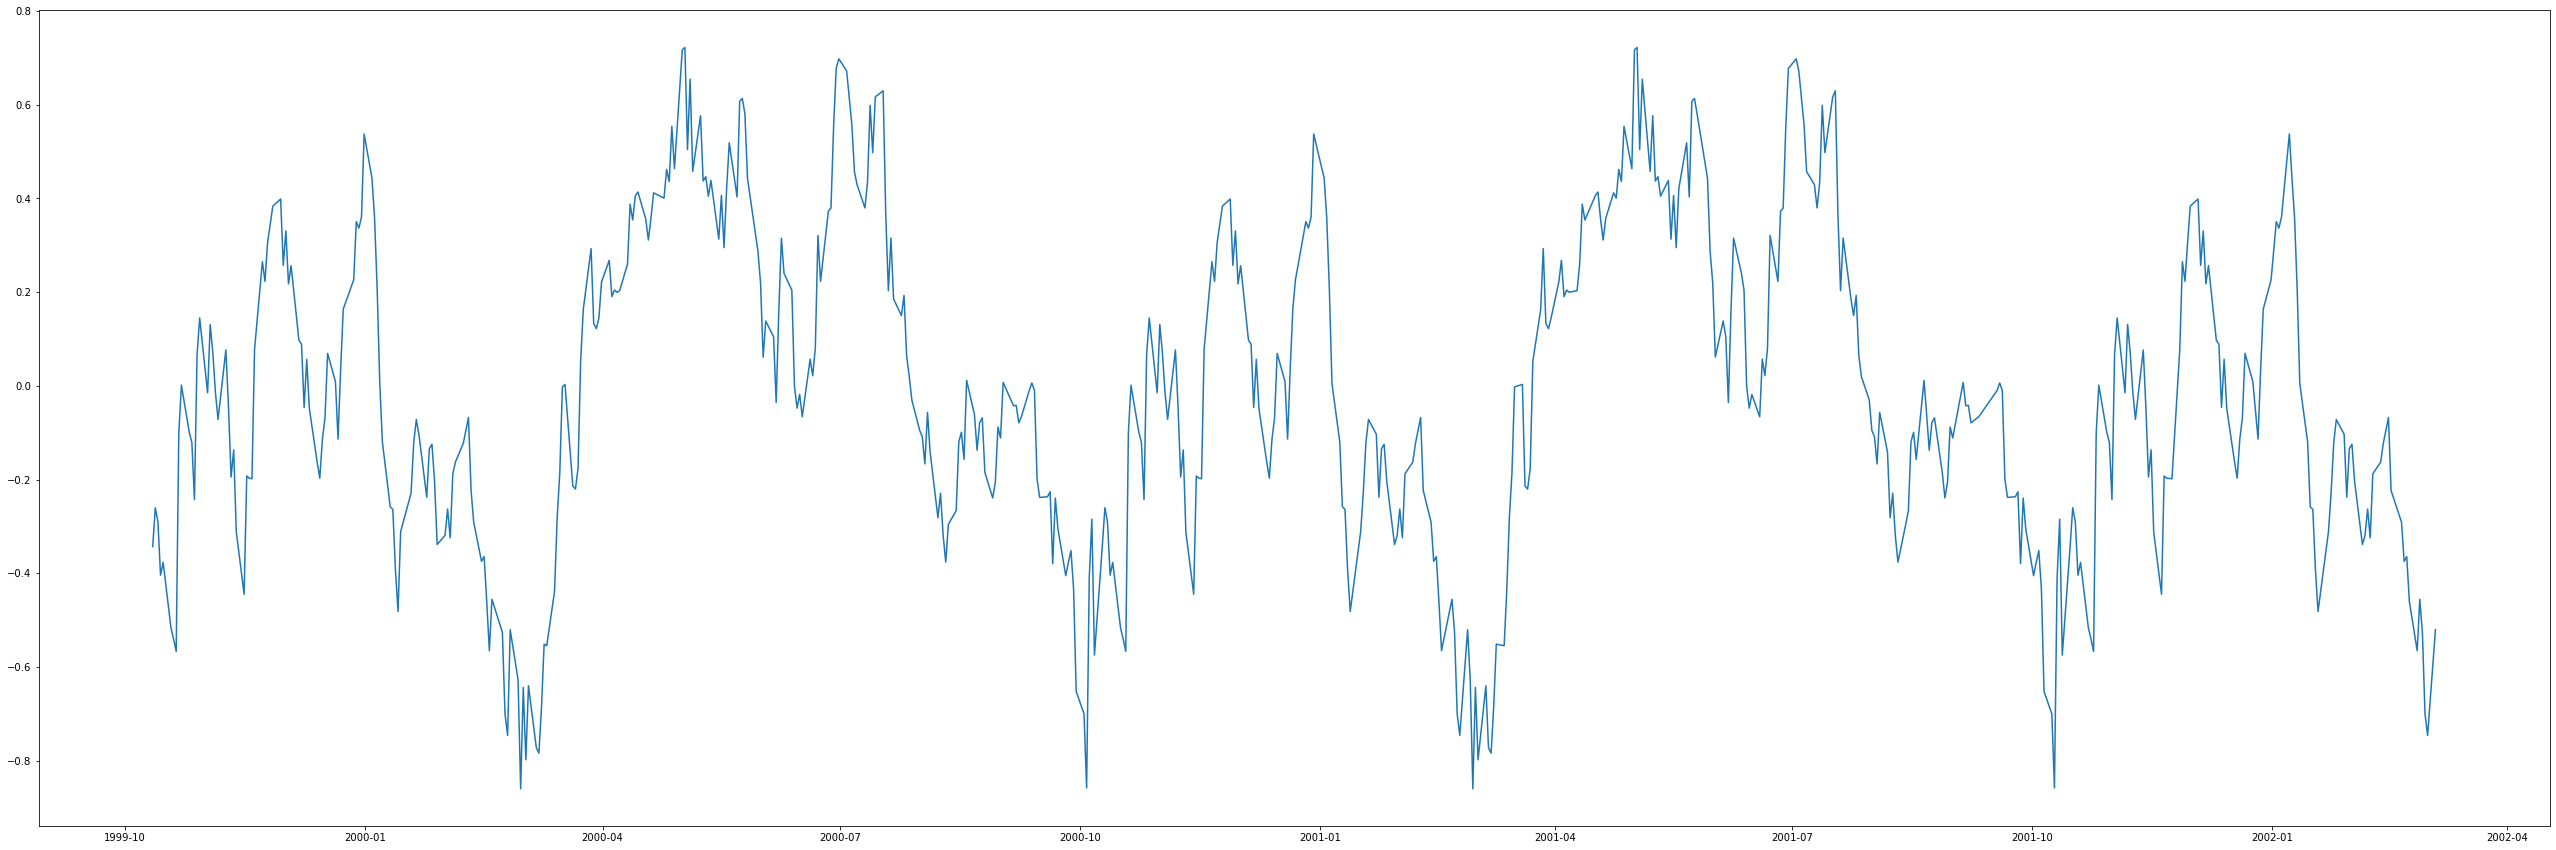

In [130]:
plt.figure(figsize=(45,15))

plt.plot(seasonal[900:1500])

plt.show()

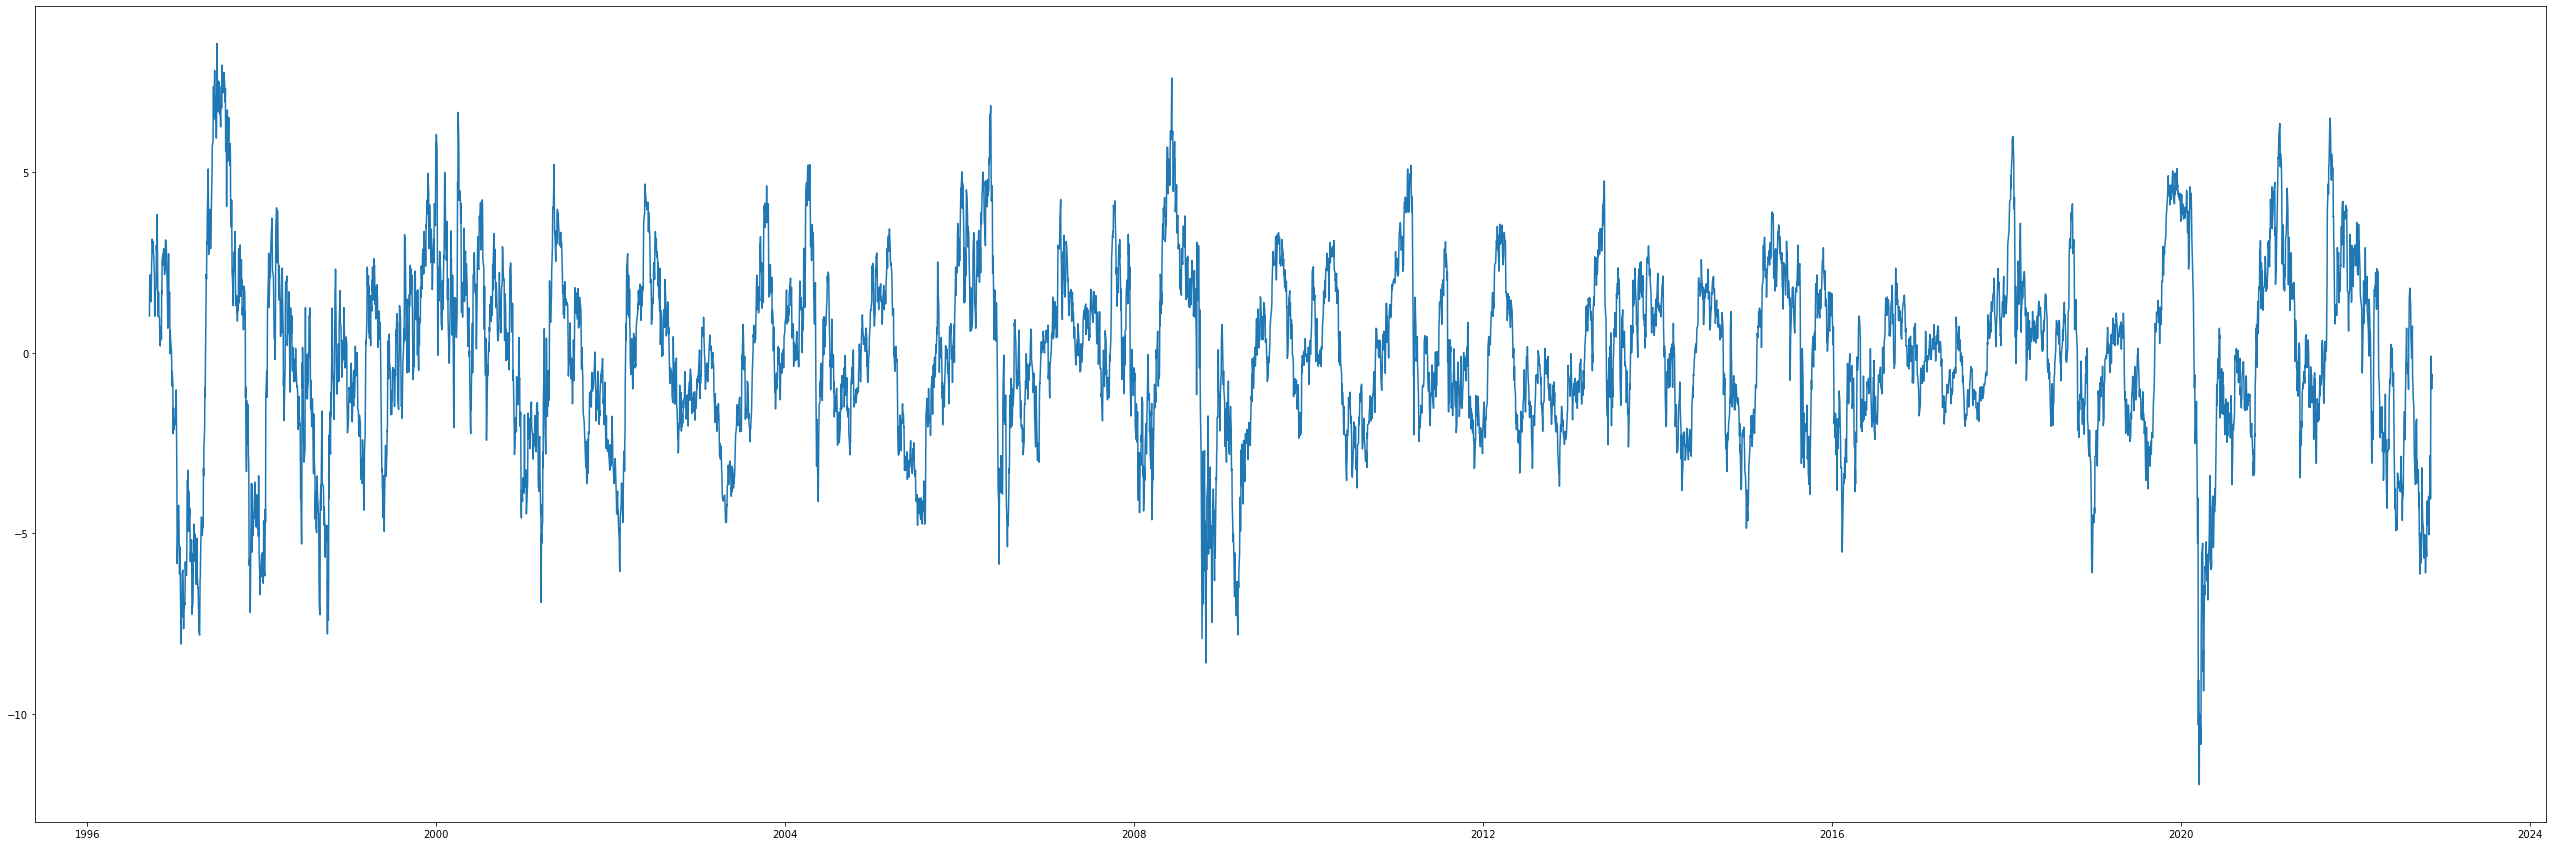

In [131]:
plt.figure(figsize=(45,15))

plt.plot(residual)

plt.show()

In [132]:
log_diff = np.log(arma_df['close']).diff(1).dropna(axis=0)

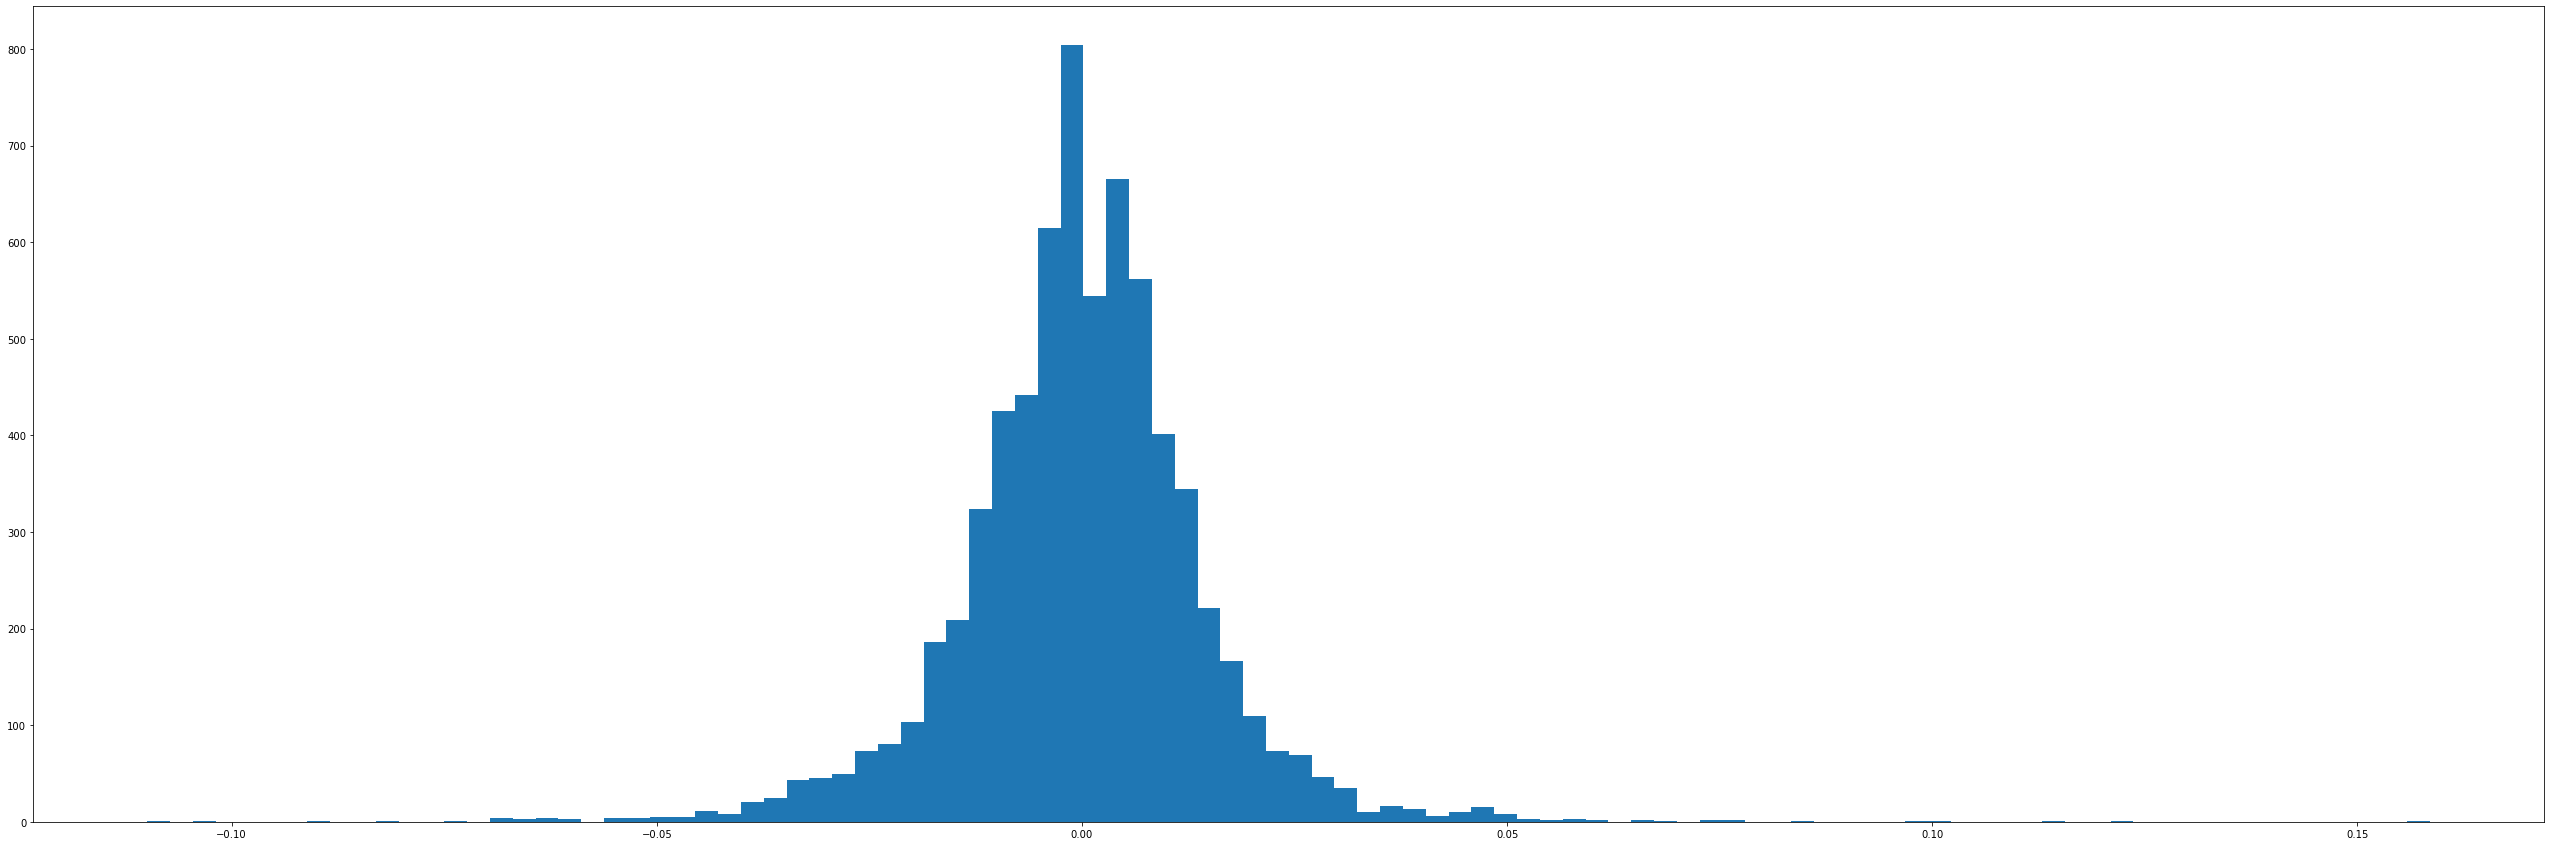

In [133]:
plt.figure(figsize=(45,15))

plt.hist(log_diff,bins=100)

plt.show()

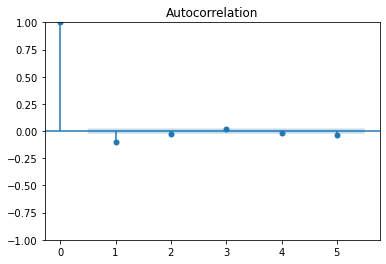

In [134]:
plot_acf(log_diff, alpha=0.05, lags=5).savefig("acf.jpg")

c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


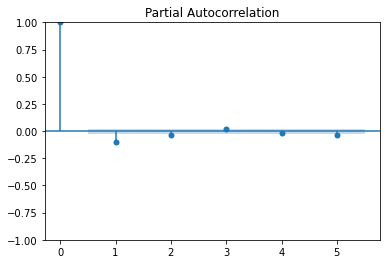

In [135]:
plot_pacf(log_diff, alpha=0.05, lags=5).savefig("pacf.jpg")